In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
import re
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
df = pd.read_csv('/content/SP data - الورقة1.csv')

In [3]:
df

,Ticket,Authority
0,السلام عليكم . سنتر جديد وعروض خياليه تتسبب بز...,وزارة التجارة
1,السلام عليكم ورحمة الله وبركاته خوتم مباركه لد...,وزارة التجارة
2,لي شحنه شي ان لها استرجاع من شركة ايمايل,الهيئة العامة للنقل
3,تم تزويدكم برقم الهاتف والإسم حسب طلبكم بالخاص...,وزارة التجارة
4,السلام عليكم ورحمة الله وبركاته، يا اخوان لي ا...,وزارة التجارة
...,...,...
1999,لم يتم تسليم الطلبية بشكل كامل من قبل تطبيق هن...,الهيئة العامة للنقل
2000,تم إلغاء رحلتي مع تطبيق أوبر بدون أي تنبيه مسب...,الهيئة العامة للنقل
2001,تأخرت شحنتي لمدة أسبوع دون أي تحديث أو توضيح م...,الهيئة العامة للنقل
2002,تم فقدان طردي في الطريق من قبل شركة الشحن أرام...,الهيئة العامة للنقل


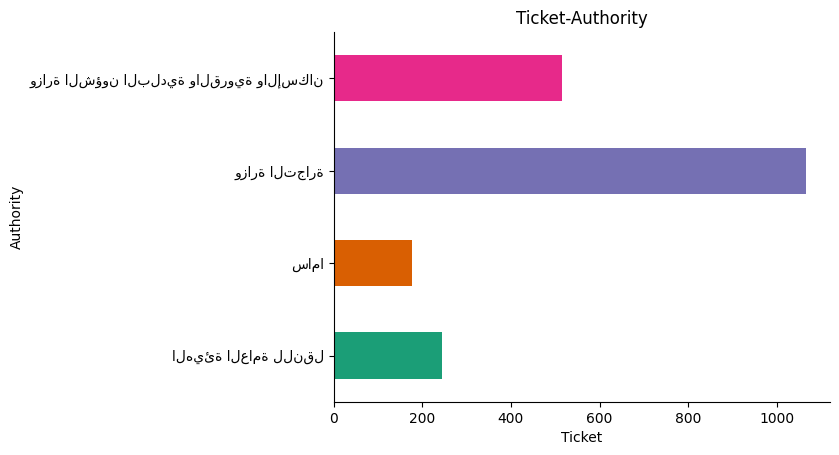

In [4]:
# Group by 'Authority' and calculate the size of each Authority
category_sizes = df.groupby('Authority').size()

# Plot the sizes in a horizontal bar chart
category_sizes.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Customize the plot if desired
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Ticket')
plt.ylabel('Authority')
plt.title('Ticket-Authority')

# Display the plot
plt.show()

<ipython-input-5-ad1ca02184ef>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")


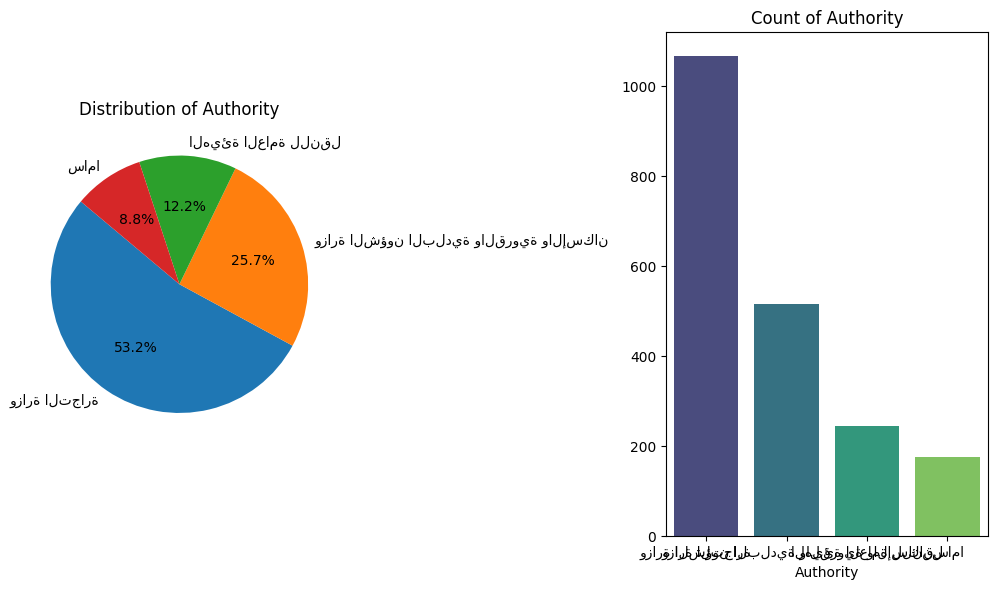

In [5]:
# Value Count Of Category
count = df['Authority'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Authority')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Authority')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [6]:
df.Authority.value_counts()

Authority
وزارة التجارة                             1066
وزارة الشؤون البلدية والقروية والإسكان     516
الهيئة العامة للنقل                        245
ساما                                       177
Name: count, dtype: int64

In [7]:
df.shape

(2004, 2)

In [8]:
df.columns

Index(['Ticket', 'Authority'], dtype='object')

In [9]:
df.head()

,Ticket,Authority
0,السلام عليكم . سنتر جديد وعروض خياليه تتسبب بز...,وزارة التجارة
1,السلام عليكم ورحمة الله وبركاته خوتم مباركه لد...,وزارة التجارة
2,لي شحنه شي ان لها استرجاع من شركة ايمايل,الهيئة العامة للنقل
3,تم تزويدكم برقم الهاتف والإسم حسب طلبكم بالخاص...,وزارة التجارة
4,السلام عليكم ورحمة الله وبركاته، يا اخوان لي ا...,وزارة التجارة


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Ticket     2004 non-null   object
 1   Authority  2004 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [11]:
df.describe()

,Ticket,Authority
count,2004,2004
unique,1991,4
top,السادة الموقرين بوزارة التجارة \n \n السلام عل...,وزارة التجارة
freq,3,1066


In [12]:
df.isnull().sum() #not right now

Ticket       0
Authority    0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Ticket       0
Authority    0
dtype: int64

In [15]:
df.duplicated().sum()

12

In [16]:
df.drop_duplicates()

,Ticket,Authority
0,السلام عليكم . سنتر جديد وعروض خياليه تتسبب بز...,وزارة التجارة
1,السلام عليكم ورحمة الله وبركاته خوتم مباركه لد...,وزارة التجارة
2,لي شحنه شي ان لها استرجاع من شركة ايمايل,الهيئة العامة للنقل
3,تم تزويدكم برقم الهاتف والإسم حسب طلبكم بالخاص...,وزارة التجارة
4,السلام عليكم ورحمة الله وبركاته، يا اخوان لي ا...,وزارة التجارة
...,...,...
1999,لم يتم تسليم الطلبية بشكل كامل من قبل تطبيق هن...,الهيئة العامة للنقل
2000,تم إلغاء رحلتي مع تطبيق أوبر بدون أي تنبيه مسب...,الهيئة العامة للنقل
2001,تأخرت شحنتي لمدة أسبوع دون أي تحديث أو توضيح م...,الهيئة العامة للنقل
2002,تم فقدان طردي في الطريق من قبل شركة الشحن أرام...,الهيئة العامة للنقل


In [17]:
df.columns

Index(['Ticket', 'Authority'], dtype='object')

# Pre-Processing

In [18]:
df.Authority[0]

'وزارة التجارة'

In [19]:
df.Ticket[0]

'السلام عليكم . سنتر جديد وعروض خياليه تتسبب بزحام خانق من الزبائن . تتفأجاء بطمس الاسعار من بعض المنتجات ؟ لا اعتقد ان ازالة السعر بهذا الشكل صدفة! \n اتمني من فرع وزارة التجارة فرع'

In [20]:
def remove_numbers(text):
    cleaned_text = re.sub(r'\d+', '', text)
    return cleaned_text

# Apply remove_numbers function to the 'Text' column
df['cleaned_Authority'] = df['Authority'].apply(remove_numbers)
df['cleaned_Ticket'] = df['Ticket'].apply(remove_numbers)

In [21]:
df['cleaned_Authority'][0]

'وزارة التجارة'

In [22]:
df['cleaned_Ticket'][0]

'السلام عليكم . سنتر جديد وعروض خياليه تتسبب بزحام خانق من الزبائن . تتفأجاء بطمس الاسعار من بعض المنتجات ؟ لا اعتقد ان ازالة السعر بهذا الشكل صدفة! \n اتمني من فرع وزارة التجارة فرع'

In [23]:
ara_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation
stop_words = stopwords.words()

def preprocess(text):

    #remove punctuations
    translator = str.maketrans('', '', ara_punctuations)
    text = text.translate(translator)

    return text


df['cleaned_Authority'] = df['cleaned_Authority'].apply(preprocess)
df['cleaned_Ticket'] = df['cleaned_Ticket'].apply(preprocess)

In [24]:
df['cleaned_Authority'][0]

'وزارة التجارة'

In [25]:
df['cleaned_Ticket'][0]

'السلام عليكم  سنتر جديد وعروض خياليه تتسبب بزحام خانق من الزبائن  تتفأجاء بطمس الاسعار من بعض المنتجات  لا اعتقد ان ازالة السعر بهذا الشكل صدفة \n اتمني من فرع وزارة التجارة فرع'

In [26]:
import re

def remove_spaces_arabic(text):
    # Define a regular expression pattern to match spaces in Arabic text
    pattern = r'\s+'

    # Use the sub() function from the re library to replace spaces with an empty string
    cleaned_text = re.sub(pattern, ' ', text)
    return cleaned_text
df['cleaned_Authority'] = df['cleaned_Authority'].apply(remove_spaces_arabic)
df['cleaned_Ticket'] = df['cleaned_Ticket'].apply(remove_spaces_arabic)

In [27]:
df["cleaned_Authority"][0]

'وزارة التجارة'

In [28]:
df["cleaned_Ticket"][0]

'السلام عليكم سنتر جديد وعروض خياليه تتسبب بزحام خانق من الزبائن تتفأجاء بطمس الاسعار من بعض المنتجات لا اعتقد ان ازالة السعر بهذا الشكل صدفة اتمني من فرع وزارة التجارة فرع'

In [29]:
import nltk
nltk.download('isri')

from nltk.stem.isri import ISRIStemmer

stemmer = ISRIStemmer()


# Function to apply stemming using ISRIStemmer to a text
def apply_stemming(text):
    stemmed_text = [stemmer.stem(word) for word in text.split()]
    return ' '.join(stemmed_text)

# Apply stemming to the 'Text' column
df['cleaned_Authority'] = df['cleaned_Authority'].apply(apply_stemming)
df['cleaned_Ticket'] = df['cleaned_Ticket'].apply(apply_stemming)

[nltk_data] Error loading isri: Package 'isri' not found in index


In [30]:
df['cleaned_Authority'][0]

'وزر جار'

In [31]:
df['cleaned_Ticket'][0]

'سلم علي نتر جدد عرض خيل سبب زحم خنق من زبن أجء طمس سعر من بعض نتج لا عقد ان زلة سعر بهذا شكل صدف اتم من فرع وزر جار فرع'

In [32]:
df.head()

,Ticket,Authority,cleaned_Authority,cleaned_Ticket
0,السلام عليكم . سنتر جديد وعروض خياليه تتسبب بز...,وزارة التجارة,وزر جار,سلم علي نتر جدد عرض خيل سبب زحم خنق من زبن أجء...
1,السلام عليكم ورحمة الله وبركاته خوتم مباركه لد...,وزارة التجارة,وزر جار,سلم علي رحم الل وبر خوتم برك لدا طلب فرع رقم ر...
2,لي شحنه شي ان لها استرجاع من شركة ايمايل,الهيئة العامة للنقل,هيئ عمة نقل,لي شحن شي ان لها رجع من شرك ايل
3,تم تزويدكم برقم الهاتف والإسم حسب طلبكم بالخاص...,وزارة التجارة,وزر جار,تم زود رقم هتف اسم حسب طلب خاص وهذ عمل شرء لغء...
4,السلام عليكم ورحمة الله وبركاته، يا اخوان لي ا...,وزارة التجارة,وزر جار,سلم علي رحم الل وبر يا اخو لي الن شهر نظر رجع ...


# Machine learning model



In [33]:
#import all nesscery
import pandas as pd #for data manipulation and analysis in Python.
from sklearn.model_selection import train_test_split #This function is commonly used to split a dataset into training and testing subsets.
from sklearn.feature_extraction.text import TfidfVectorizer #convert a collection of raw documents into a matrix of TF-IDF features.
from sklearn.svm import SVC #SVC stands for Support Vector Classifier, which is a type of support vector machine model used for classification tasks.
from sklearn.metrics import accuracy_score #This function is used to calculate the accuracy of a classification model.
import matplotlib.pyplot as plt #commonly used for creating plots and visualizations in Python.
from sklearn.preprocessing import MinMaxScaler #is used for scaling features to a range, typically between 0 and 1.
from sklearn.tree import DecisionTreeClassifier # Decision trees are a type of supervised learning algorithm used for classification and regression tasks.
from sklearn.metrics import confusion_matrix #is used to evaluate the performance of a classification model by comparing predicted labels with true labels.
from sklearn import tree #provides tools for working with decision trees and related algorithms.

In [34]:
#split training and testing
x_stemmed = df['cleaned_Ticket'] # This line extracts the feature data from the DataFrame df. It assumes that the DataFrame contains a column named 'cleaned_Content',
#which likely holds preprocessed or cleaned text data.
y = df['Authority'] #This line extracts the target variable (or label) from the DataFrame df. It assumes that the DataFrame contains a column named 'Category',
#which likely represents the class or category each data point belongs to.

x_train, x_test, y_train, y_test = train_test_split(x_stemmed, y, test_size=0.2, random_state=42)

#This line splits the data into training and testing sets using the train_test_split function imported from scikit-learn earlier.
#x_stemmed: This is the feature data that will be split into training and testing sets.
#y: This is the target variable associated with each data point.
#test_size=0.2: This parameter specifies the proportion of the dataset to include in the testing set. Here, it's set to 0.2, meaning 20% of the data will be used for testing, and the remaining 80% will be used for training.
#random_state=42: This parameter sets the random seed for reproducibility. It ensures that the split is deterministic and the same split can be reproduced if the code is run again with the same seed.

# **Support Vector Machine (SVM)**

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer() #NLP tech
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [36]:
svm = SVC()
svm.fit(x_train_vectorized, y_train)

SVC()

In [37]:
SVMy_pred_test = svm.predict(x_test_vectorized)

SVMy_pred_train = svm.predict(x_train_vectorized)

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [39]:
accuracy_SVM = accuracy_score(y_train, SVMy_pred_train)


accuracy = accuracy_score(y_test, SVMy_pred_test)
precision = precision_score(y_test, SVMy_pred_test, average='weighted')
recall = recall_score(y_test, SVMy_pred_test, average='weighted')
f1 = f1_score(y_test, SVMy_pred_test, average='weighted')

print("SVM training Accuracy : ", accuracy_SVM)
print("SVM testing Accuracy:", accuracy)
print("SVM precision : ", precision)
print("SVM recall:", recall)
print("SVM f1-score:", f1)
print("SVM accuracy:", accuracy)

SVM training Accuracy :  0.9862757330006239
SVM testing Accuracy: 0.8453865336658354
SVM precision :  0.8766433790402054
SVM recall: 0.8453865336658354
SVM f1-score: 0.8347538787400174
SVM accuracy: 0.8453865336658354


In [40]:
from sklearn.metrics import classification_report

report_final= classification_report(y_test, SVMy_pred_test)

print("Classification Report:")
print(report_final)

Classification Report:
                                        precision    recall  f1-score   support

                   الهيئة العامة للنقل       1.00      0.39      0.56        41
                                  ساما       1.00      0.71      0.83        38
                         وزارة التجارة       0.78      1.00      0.87       212
وزارة الشؤون البلدية والقروية والإسكان       0.98      0.77      0.86       110

                              accuracy                           0.85       401
                             macro avg       0.94      0.72      0.78       401
                          weighted avg       0.88      0.85      0.83       401



# **Hyperparameter using GridSearch CV:**

In [41]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.01, 0.1, 1, 10],
    'class_weight': [None, 'balanced']
}

# Create the SVM model
svm_model = SVC()

# Perform grid search
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train_vectorized, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [43]:
# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'linear'}
Best Score: 0.865255062305296


In [44]:
SVM_tuned = SVC(C =1, class_weight= 'balanced', gamma= 0.01, kernel= 'linear')
SVM_tuned.fit(x_train_vectorized, y_train)

SVC(C=1, class_weight='balanced', gamma=0.01, kernel='linear')

In [45]:
SVM_pred_train_tuned = SVM_tuned.predict(x_train_vectorized)
SVM_pred_test_tuned = SVM_tuned.predict(x_test_vectorized)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_SVM_tuned = accuracy_score(y_train, SVM_pred_train_tuned)
accuracy = accuracy_score(y_test, SVM_pred_test_tuned)
precision = precision_score(y_test, SVM_pred_test_tuned, average='weighted')
recall = recall_score(y_test, SVM_pred_test_tuned, average='weighted')
f1 = f1_score(y_test, SVM_pred_test_tuned, average='weighted')

print("SVM stemmed training Accuracy : ", accuracy_SVM_tuned)
print("SVM stemmed testing Accuracy:", accuracy)
print("SVM stemmed precision : ", precision)
print("SVM stemmed recall:", recall)
print("SVM stemmed f1-score:", f1)

SVM stemmed training Accuracy :  0.9775421085464754
SVM stemmed testing Accuracy: 0.885286783042394
SVM stemmed precision :  0.8856241991199408
SVM stemmed recall: 0.885286783042394
SVM stemmed f1-score: 0.8850512396499027


In [47]:
from sklearn.metrics import classification_report

report_final= classification_report(y_test, SVM_pred_test_tuned)

print("Classification Report:")
print(report_final)

Classification Report:
                                        precision    recall  f1-score   support

                   الهيئة العامة للنقل       0.78      0.76      0.77        41
                                  ساما       0.94      0.87      0.90        38
                         وزارة التجارة       0.89      0.92      0.90       212
وزارة الشؤون البلدية والقروية والإسكان       0.91      0.87      0.89       110

                              accuracy                           0.89       401
                             macro avg       0.88      0.85      0.87       401
                          weighted avg       0.89      0.89      0.89       401



# **Testing the SVM  model**

In [96]:
import unittest
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import traceback

class TestAuthorityPredictor(unittest.TestCase):
    def setUp(self):
        # Initialize the vectorizer
        self.vectorizer = TfidfVectorizer()
        # Fit the vectorizer with raw text data
        self.vectorizer.fit(x_train)
        # Transform the raw text data to obtain the vectorized representation
        self.x_train_vectorized = self.vectorizer.transform(x_train)
        # Initialize the SVM model
        self.model = SVC()
        # Fit the SVM model with the vectorized training data and corresponding labels
        self.model.fit(self.x_train_vectorized, y_train)


    def test_predict_authority(self):
        try:
            # test case 1
            random_ticket = 'هل يحق  لي استرجاع الطلب اذا كان المتجر الالكتروني و من سياسته عدم الاسترجاع ؟ علماً بان الطلب تفصيل وليس على المقاس'

            # Vectorize the random ticket
            random_ticket_vectorized = self.vectorizer.transform([random_ticket])

            # Predict the authority
            predicted_authority = self.model.predict(random_ticket_vectorized)

            # Define expected authority
            expected_authority = 'وزارة التجارة'

            # Assert the predicted authority matches the expected authority
            self.assertEqual(predicted_authority, expected_authority, f"Predicted: {predicted_authority}, Expected: {expected_authority}")
            print(predicted_authority)


        except Exception as e:
            traceback.print_exc()
            raise e


if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)


..
----------------------------------------------------------------------
Ran 2 tests in 0.982s

OK


['وزارة التجارة']


In [97]:
import unittest
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import traceback

class TestAuthorityPredictor(unittest.TestCase):
    def setUp(self):
        # Initialize the vectorizer
        self.vectorizer = TfidfVectorizer()
        # Fit the vectorizer with raw text data
        self.vectorizer.fit(x_train)
        # Transform the raw text data to obtain the vectorized representation
        self.x_train_vectorized = self.vectorizer.transform(x_train)
        # Initialize the SVM model
        self.model = SVC()
        # Fit the SVM model with the vectorized training data and corresponding labels
        self.model.fit(self.x_train_vectorized, y_train)


    def test_predict_authority(self):
        try:
            # test case 2
            random_ticket = 'اسوء شركة شحن وادق عليهم يقولو ما عليكي رفعنا طلبك وكل يوم ادق ونفس الحل صارو الحين معد يردو'
            # Vectorize the random ticket
            random_ticket_vectorized = self.vectorizer.transform([random_ticket])

            # Predict the authority
            predicted_authority = self.model.predict(random_ticket_vectorized)

            # Define expected authority
            expected_authority = 'الهيئة العامة للنقل'

            # Assert the predicted authority matches the expected authority
            self.assertEqual(predicted_authority, expected_authority, f"Predicted: {predicted_authority}, Expected: {expected_authority}")
            print(predicted_authority)


        except Exception as e:
            traceback.print_exc()
            raise e


if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.963s

OK


['الهيئة العامة للنقل']
